# Transfer Learning 실습

## Import modules

In [1]:
!pip install tensorflow-datasets

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

## 하이퍼파라미터 정의

In [3]:
EPOCHS = 100

## 네트워크 구조 정의

In [4]:
def MyModel():
    feat = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                             include_top=False)
    feat.trainable = False
    
    seq = tf.keras.models.Sequential()
    seq.add(feat) # h x w x c 
    seq.add(tf.keras.layers.GlobalAveragePooling2D()) # c
    seq.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    return seq

## 데이터 불러오기 (Cats vs. Dogs)

In [5]:
split = tfds.Split.TRAIN.subsplit(weighted=(8, 2))
dataset, meta = tfds.load('cats_vs_dogs',
                          split=list(split),
                          with_info=True,
                          as_supervised=True)

train_ds, test_ds = dataset

## 데이터 확인하기

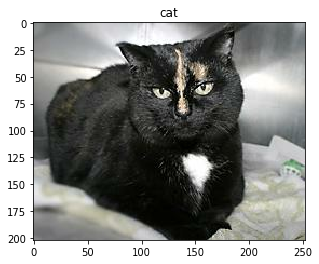

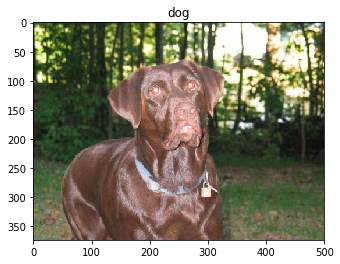

In [6]:
l2s = meta.features['label'].int2str
for img, label in test_ds.take(2):
    plt.figure()
    plt.imshow(img)
    plt.title(l2s(label))

## 데이터 가공하기

In [7]:
def preprocess(img, label):
    img = tf.cast(img, tf.float32) / 255.0
    img = tf.image.resize(img, (224, 224))
    return img, label

train_ds = train_ds.map(preprocess).batch(32).prefetch(1024)
test_ds = test_ds.map(preprocess).batch(32).prefetch(1024)

## 모델 생성

In [8]:
model = MyModel()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 모델 학습

In [9]:
model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS)

Epoch 1/100


W1111 20:10:35.786327 140450489378624 deprecation.py:323] From /home/jeyong/.conda/envs/tf2.0b1/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


582/582 [==============================] - 26s 44ms/step - loss: 0.1633 - accuracy: 0.9366 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
582/582 [==============================] - 18s 31ms/step - loss: 0.0990 - accuracy: 0.9629 - val_loss: 0.1477 - val_accuracy: 0.9519
Epoch 3/100
582/582 [==============================] - 18s 31ms/step - loss: 0.0895 - accuracy: 0.9668 - val_loss: 0.1533 - val_accuracy: 0.9502
Epoch 4/100
582/582 [==============================] - 18s 31ms/step - loss: 0.0843 - accuracy: 0.9688 - val_loss: 0.1571 - val_accuracy: 0.9500
Epoch 5/100
582/582 [==============================] - 18s 31ms/step - loss: 0.0806 - accuracy: 0.9707 - val_loss: 0.1598 - val_accuracy: 0.9509
Epoch 6/100
582/582 [==============================] - 18s 31ms/step - loss: 0.0777 - accuracy: 0.9716 - val_loss: 0.1618 - val_accuracy: 0.9506
Epoch 7/100
582/582 [==============================] - 18s 31ms/step - loss: 0.0752 - accuracy: 0.9727 - val_loss: 0.1632 - val_accura

KeyboardInterrupt: 